In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/Users/akshitkamboj/Downloads/archive/Train.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
df.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [6]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
cat_cols = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        cat_cols.append(x)

In [8]:
cat_cols

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [9]:
cat_cols.remove('Item_Identifier')
cat_cols.remove('Outlet_Identifier')

In [10]:
cat_cols

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [11]:
for col in cat_cols:
    print(col + ":")
    print(df[col].value_counts())
    print()

Item_Fat_Content:
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Type:
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Size:
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Outlet_Location_Type:
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Outlet_Type:
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype:

In [12]:
item_weight_mean = df.pivot_table(values = 'Item_Weight', index = 'Item_Identifier')
item_weight_mean

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [13]:
miss_bool = df['Item_Weight'].isnull()
miss_bool

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

In [14]:
for i, item in enumerate(df['Item_Identifier']):
    if miss_bool[i]:
        if item in item_weight_mean:
            df['Item_Weight'][i] = item_weight_mean.loc[item]['Item_Weight']
        else:
            df['Item_Weight'][i] = np.mean(df['Item_Weight'])

In [15]:
df[df['Item_Identifier'] == 'FDN52']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,12.857645,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564


In [16]:
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [17]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [18]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [19]:
outlet_size_mode = df.pivot_table(values = 'Outlet_Size', columns = 'Outlet_Type', aggfunc = (lambda x: x.mode()[0]))
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [20]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [21]:
df.dtypes.mode()[0]

dtype('O')

In [22]:
miss_bool = df['Outlet_Size'].isnull()
miss_bool

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [23]:
df.loc[miss_bool, 'Outlet_Size'] = df.loc[miss_bool, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

In [24]:
df['Outlet_Size'].isnull().sum()

0

In [25]:
outlet_size_mode['Grocery Store']

Outlet_Size    Small
Name: Grocery Store, dtype: object

In [26]:
df.loc[miss_bool, 'Outlet_Size']

3       Small
8       Small
9       Small
25      Small
28      Small
        ...  
8502    Small
8508    Small
8509    Small
8514    Small
8519    Small
Name: Outlet_Size, Length: 2410, dtype: object

In [27]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [28]:
sum(df['Item_Visibility'] == 0)

526

In [29]:
df.loc[:, 'Item_Visibility'].replace([0], [df['Item_Visibility'].mean()], inplace = True)

In [30]:
sum(df['Item_Visibility'] == 0)


0

In [31]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({
    'LF': 'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'
})
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [32]:
df['New_Item_Type'] = df['Item_Identifier'].apply(lambda x: x[: 2])
df['New_Item_Type']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_Item_Type, Length: 8523, dtype: object

In [33]:
df['New_Item_Type'] = df['New_Item_Type'].map({
    'FD': 'Food', 'NC': 'Non-Consumable', 'DR': 'Drinks'
})
df['New_Item_Type'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: New_Item_Type, dtype: int64

In [34]:
df['Item_Identifier'].nunique()

1559

In [35]:
df.loc[df['New_Item_Type'] == 'Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
df['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

In [37]:
df['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [38]:
df['Outlet_Years'] = 2013 - df['Outlet_Establishment_Year']

In [39]:
df['Outlet_Years']

0       14
1        4
2       14
3       15
4       26
        ..
8518    26
8519    11
8520     9
8521     4
8522    16
Name: Outlet_Years, Length: 8523, dtype: int64

In [40]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,15
4,NCD19,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,26


<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

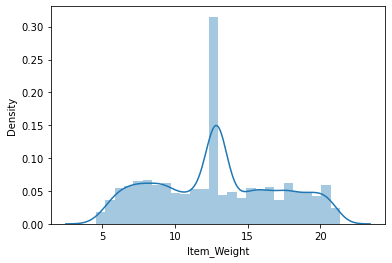

In [41]:
sns.distplot(df['Item_Weight'])

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

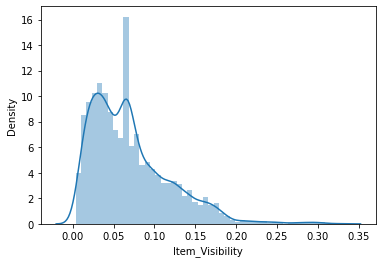

In [42]:
sns.distplot(df['Item_Visibility'])

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

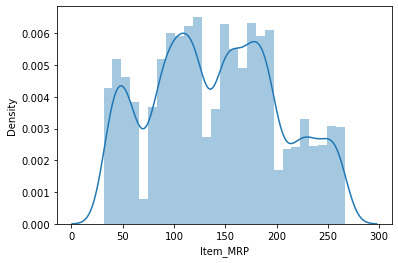

In [43]:
sns.distplot(df['Item_MRP'])

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

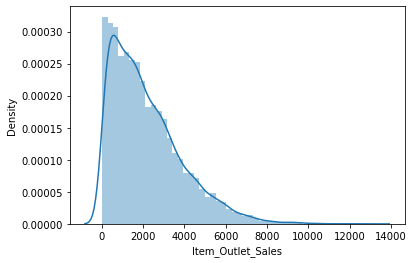

In [44]:
sns.distplot(df['Item_Outlet_Sales'])

In [45]:
df['Item_Outlet_Sales'] = np.log(1 + df['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

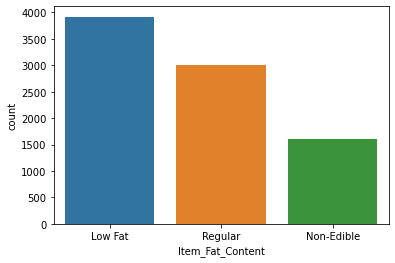

In [46]:
sns.countplot(df['Item_Fat_Content'])

[Text(0, 0, 'Dairy'),
 Text(1, 0, 'Soft Drinks'),
 Text(2, 0, 'Meat'),
 Text(3, 0, 'Fruits and Vegetables'),
 Text(4, 0, 'Household'),
 Text(5, 0, 'Baking Goods'),
 Text(6, 0, 'Snack Foods'),
 Text(7, 0, 'Frozen Foods'),
 Text(8, 0, 'Breakfast'),
 Text(9, 0, 'Health and Hygiene'),
 Text(10, 0, 'Hard Drinks'),
 Text(11, 0, 'Canned'),
 Text(12, 0, 'Breads'),
 Text(13, 0, 'Starchy Foods'),
 Text(14, 0, 'Others'),
 Text(15, 0, 'Seafood')]

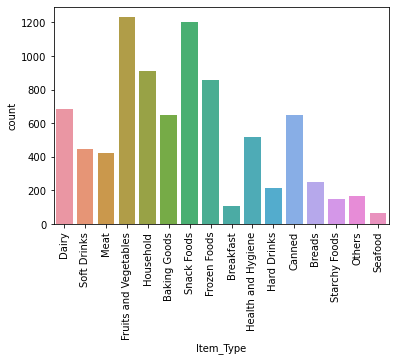

In [55]:
# plt.figure(figsize = (25, 5))
l = list(df['Item_Type'].unique())
chart = sns.countplot(df['Item_Type'])
chart.set_xticklabels(labels = l, rotation = 90)

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

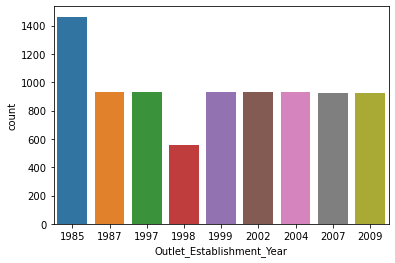

In [56]:
sns.countplot(df['Outlet_Establishment_Year'])

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

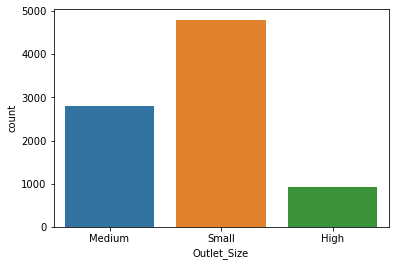

In [57]:
sns.countplot(df['Outlet_Size'])

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

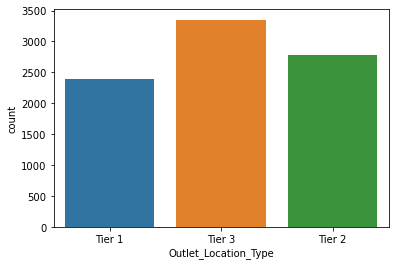

In [58]:
sns.countplot(df['Outlet_Location_Type'])

[Text(0, 0, 'Supermarket Type1'),
 Text(1, 0, 'Supermarket Type2'),
 Text(2, 0, 'Grocery Store'),
 Text(3, 0, 'Supermarket Type3')]

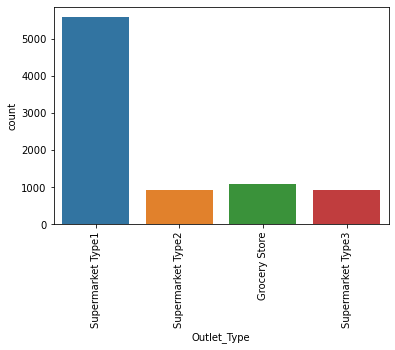

In [60]:
l = list(df['Outlet_Type'].unique())
chart = sns.countplot(df['Outlet_Type'])
chart.set_xticklabels(labels = l, rotation = 90)

<AxesSubplot:>

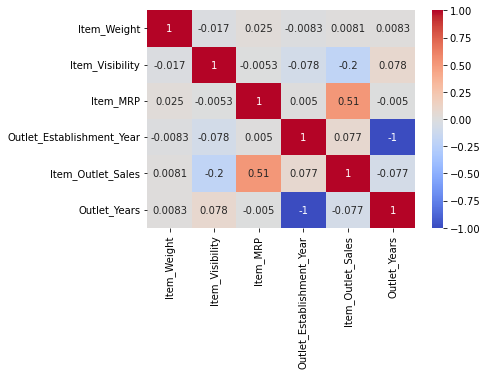

In [61]:
corr = df.corr()
sns.heatmap(corr, annot = True, cmap = 'coolwarm')

In [62]:
from sklearn.preprocessing import LabelEncoder

In [64]:
le = LabelEncoder()
df['Outlet'] = le.fit_transform(df['Outlet_Identifier'])

In [65]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years,Outlet
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,8.225808,Food,14,9
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,6.096776,Drinks,4,3
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,7.648868,Food,14,9
3,FDX07,19.200,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,6.597664,Food,15,0
4,NCD19,8.930,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,6.903451,Non-Consumable,26,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,7.929984,Food,26,1
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,6.310436,Food,11,7
8520,NCJ29,10.600,Non-Edible,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,7.085159,Non-Consumable,9,6
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,7.521100,Food,4,3


In [66]:
cat_cols = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type']
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [67]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years,Outlet
0,FDA15,9.300,0,0.016047,4,249.8092,OUT049,1999,1,0,1,8.225808,1,14,9
1,DRC01,5.920,2,0.019278,14,48.2692,OUT018,2009,1,2,2,6.096776,0,4,3
2,FDN15,17.500,0,0.016760,10,141.6180,OUT049,1999,1,0,1,7.648868,1,14,9
3,FDX07,19.200,2,0.066132,6,182.0950,OUT010,1998,2,2,0,6.597664,1,15,0
4,NCD19,8.930,1,0.066132,9,53.8614,OUT013,1987,0,2,1,6.903451,2,26,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0,0.056783,13,214.5218,OUT013,1987,0,2,1,7.929984,1,26,1
8519,FDS36,8.380,2,0.046982,0,108.1570,OUT045,2002,2,1,1,6.310436,1,11,7
8520,NCJ29,10.600,1,0.035186,8,85.1224,OUT035,2004,2,1,1,7.085159,2,9,6
8521,FDN46,7.210,2,0.145221,13,103.1332,OUT018,2009,1,2,2,7.521100,1,4,3


In [68]:
df = pd.get_dummies(df, columns = ['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type'])
df.head(10)

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years,Outlet,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
0,FDA15,9.300000,0.016047,4,249.8092,OUT049,1999,8.225808,14,9,...,1,0,0,0,1,0,0,0,1,0
1,DRC01,5.920000,0.019278,14,48.2692,OUT018,2009,6.096776,4,3,...,0,0,1,0,0,1,0,1,0,0
2,FDN15,17.500000,0.016760,10,141.6180,OUT049,1999,7.648868,14,9,...,1,0,0,0,1,0,0,0,1,0
3,FDX07,19.200000,0.066132,6,182.0950,OUT010,1998,6.597664,15,0,...,0,0,1,1,0,0,0,0,1,0
4,NCD19,8.930000,0.066132,9,53.8614,OUT013,1987,6.903451,26,1,...,0,0,1,0,1,0,0,0,0,1
5,FDP36,10.395000,0.066132,0,51.4008,OUT018,2009,6.323658,4,3,...,0,0,1,0,0,1,0,0,1,0
6,FDO10,13.650000,0.012741,13,57.6588,OUT013,1987,5.842247,26,1,...,0,0,1,0,1,0,0,0,1,0
7,FDP10,12.857645,0.127470,13,107.7622,OUT027,1985,8.299973,28,5,...,0,0,1,0,0,0,1,0,1,0
8,FDH17,16.200000,0.016687,5,96.9726,OUT045,2002,6.982490,11,7,...,0,1,0,0,1,0,0,0,1,0
9,FDU28,19.200000,0.094450,5,187.8214,OUT017,2007,8.457769,6,2,...,0,1,0,0,1,0,0,0,1,0


In [69]:
X = df.drop(columns = ['Outlet_Establishment_Year', 'Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']

In [76]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

def train(model, X, y):
    model.fit(X, y)
    
    pred = model.predict(X)
    
    cv_score = cross_val_score(model, X, y, scoring = 'neg_mean_squared_error', cv = 5)
    cv_score = np.abs(np.mean(cv_score))
    
    print('Model Report: ')
    print('MSE:', mean_squared_error(y, pred))
    print('CV Score: ', cv_score)

Model Report: 
MSE: 0.28800650325017957
CV Score:  0.2891214581631164


<AxesSubplot:title={'center':'Model Coefficient'}>

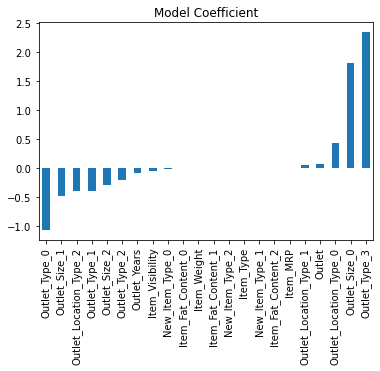

In [77]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

model = LinearRegression(normalize = True)
train(model, X, y)

coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind = 'bar', title = 'Model Coefficient')

Model Report: 
MSE: 0.4280298560568348
CV Score:  0.4289289251562642


<AxesSubplot:title={'center':'Model Coefficients'}>

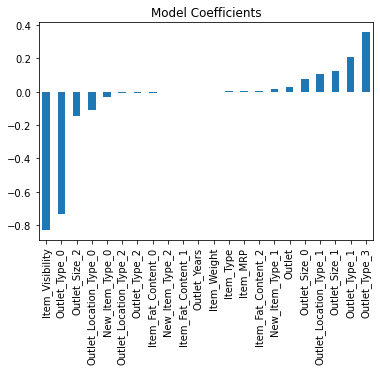

In [78]:
model = Ridge(normalize = True)
train(model, X, y)

coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind = 'bar', title = 'Model Coefficients')

Model Report: 
MSE: 0.7628688679102086
CV Score:  0.7630789166281843


<AxesSubplot:title={'center':'Model Coefficients'}>

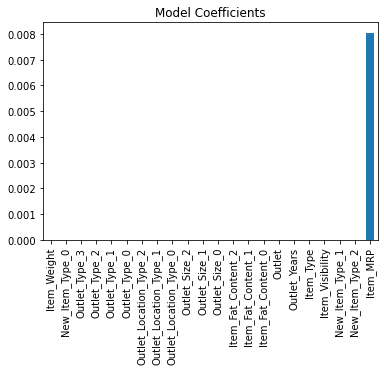

In [80]:
model = Lasso()
train(model, X, y)

coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind = 'bar', title = 'Model Coefficients')

Model Report: 
MSE: 5.5534030638578795e-34
CV Score:  0.5798245467258866


<AxesSubplot:title={'center':'Feature Importance'}>

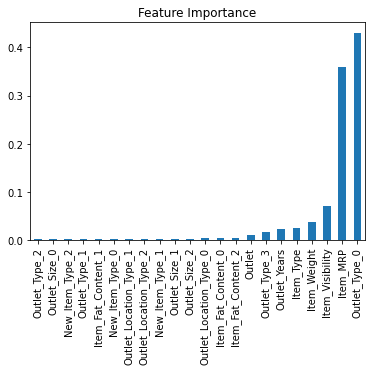

In [82]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
train(model, X, y)

coef = pd.Series(model.feature_importances_, X.columns).sort_values()
coef.plot(kind = 'bar', title = 'Feature Importance')

In [83]:
from sklearn.ensemble import RandomForestRegressor

Model Report: 
MSE: 0.04217799356381906
CV Score:  0.3103490032460988


<AxesSubplot:title={'center':'Feature Importance'}>

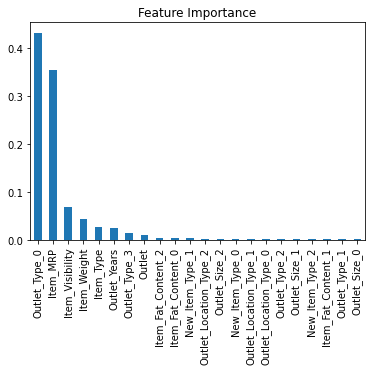

In [84]:
model = RandomForestRegressor()
train(model, X, y)

coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending = False)
coef.plot(kind = 'bar', title = 'Feature Importance')

Model Report: 
MSE: 1.041778615391114e-28
CV Score:  0.3319011243226898


<AxesSubplot:title={'center':'Feature Importance'}>

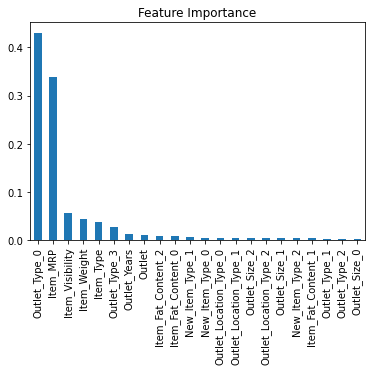

In [85]:
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending = False)
coef.plot(kind = 'bar', title = 'Feature Importance')

In [86]:
df_test = pd.read_csv('/Users/akshitkamboj/Downloads/archive/Test.csv')
df_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [87]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [88]:
miss_bool = df_test['Item_Weight'].isnull()
miss_bool

0       False
1       False
2       False
3       False
4        True
        ...  
5676    False
5677    False
5678    False
5679    False
5680    False
Name: Item_Weight, Length: 5681, dtype: bool

In [89]:
for i, item in enumerate(df_test['Item_Identifier']):
    if miss_bool[i]:
        if item in item_weight_mean:
            df_test['Item_Weight'][i] = item_weight_mean.loc[item]['Item_Weight']
        else:
            df_test['Item_Weight'][i] = np.mean(df['Item_Weight'])

In [90]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [91]:
miss_bool = df_test['Outlet_Size'].isnull()
miss_bool

0       False
1        True
2        True
3        True
4       False
        ...  
5676    False
5677    False
5678     True
5679     True
5680     True
Name: Outlet_Size, Length: 5681, dtype: bool

In [92]:
df_test.loc[miss_bool, 'Outlet_Size'] = df_test.loc[miss_bool, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

In [93]:
df_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [94]:
sum(df_test['Item_Visibility'] == 0)

353

In [95]:
df_test.loc[:, 'Item_Visibility'].replace([0], [df['Item_Visibility'].mean()], inplace = True)

In [96]:
sum(df_test['Item_Visibility'] == 0)

0

In [98]:
df_test['Item_Fat_Content'].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [99]:
df_test['Item_Fat_Content'] = df_test['Item_Fat_Content'].replace({
    'LF': 'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'
})
df_test['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [103]:
df_test['New_Item_Type'] = df_test['Item_Identifier'].apply(lambda x: x[: 2])
df_test['New_Item_Type']

0       FD
1       FD
2       NC
3       FD
4       FD
        ..
5676    FD
5677    FD
5678    NC
5679    FD
5680    FD
Name: New_Item_Type, Length: 5681, dtype: object

In [104]:
df_test['New_Item_Type'] = df_test['New_Item_Type'].map({
    'FD': 'Food', 'NC': 'Non-Consumable', 'DR': 'Drinks'
})

In [106]:
df_test['New_Item_Type'].value_counts()

Food              4076
Non-Consumable    1087
Drinks             518
Name: New_Item_Type, dtype: int64

In [107]:
df_test.loc[df_test['New_Item_Type'] == 'Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
df_test['Item_Fat_Content'].value_counts()

Low Fat       2581
Regular       2013
Non-Edible    1087
Name: Item_Fat_Content, dtype: int64

In [108]:
df_test['Outlet_Years'] = 2013 - df_test['Outlet_Establishment_Year']

In [109]:
df_test['Outlet'] = le.fit_transform(df_test['Outlet_Identifier'])

In [110]:
df_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,New_Item_Type,Outlet_Years,Outlet
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,Food,14,9
1,FDW14,8.300000,Regular,0.038428,Dairy,87.3198,OUT017,2007,Small,Tier 2,Supermarket Type1,Food,6,2
2,NCN55,14.600000,Non-Edible,0.099575,Others,241.7538,OUT010,1998,Small,Tier 3,Grocery Store,Non-Consumable,15,0
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Small,Tier 2,Supermarket Type1,Food,6,2
4,FDY38,12.857645,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,Food,28,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500000,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,Food,16,8
5677,FDD47,7.600000,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,Food,4,3
5678,NCO17,10.000000,Non-Edible,0.073529,Health and Hygiene,118.7440,OUT045,2002,Small,Tier 2,Supermarket Type1,Non-Consumable,11,7
5679,FDJ26,15.300000,Regular,0.070213,Canned,214.6218,OUT017,2007,Small,Tier 2,Supermarket Type1,Food,6,2


In [111]:
cat_cols = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type']
for col in cat_cols:
    df_test[col] = le.fit_transform(df_test[col])

In [112]:
df_test = pd.get_dummies(df_test, columns = ['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type'])
df_test.head(10)

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Years,Outlet,Item_Fat_Content_0,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
0,FDW58,20.750000,0.007565,13,107.8622,OUT049,1999,14,9,1,...,1,0,0,0,1,0,0,0,1,0
1,FDW14,8.300000,0.038428,4,87.3198,OUT017,2007,6,2,0,...,0,1,0,0,1,0,0,0,1,0
2,NCN55,14.600000,0.099575,11,241.7538,OUT010,1998,15,0,0,...,0,0,1,1,0,0,0,0,0,1
3,FDQ58,7.315000,0.015388,13,155.0340,OUT017,2007,6,2,1,...,0,1,0,0,1,0,0,0,1,0
4,FDY38,12.857645,0.118599,4,234.2300,OUT027,1985,28,5,0,...,0,0,1,0,0,0,1,0,1,0
5,FDH56,9.800000,0.063817,6,117.1492,OUT046,1997,16,8,0,...,1,0,0,0,1,0,0,0,1,0
6,FDL48,19.350000,0.082602,0,50.1034,OUT018,2009,4,3,0,...,0,0,1,0,0,1,0,0,1,0
7,FDC48,12.857645,0.015782,0,81.0592,OUT027,1985,28,5,1,...,0,0,1,0,0,0,1,0,1,0
8,FDN33,6.305000,0.123365,13,95.7436,OUT045,2002,11,7,0,...,0,1,0,0,1,0,0,0,1,0
9,FDA36,5.985000,0.005698,0,186.8924,OUT017,2007,6,2,1,...,0,1,0,0,1,0,0,0,1,0


In [114]:
test_inputs = df_test.drop(columns = ['Outlet_Establishment_Year', 'Item_Identifier', 'Outlet_Identifier'])

In [115]:
test_inputs

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Years,Outlet,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Size_0,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
0,20.750000,0.007565,13,107.8622,14,9,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,8.300000,0.038428,4,87.3198,6,2,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0
2,14.600000,0.099575,11,241.7538,15,0,0,1,0,0,...,0,0,1,1,0,0,0,0,0,1
3,7.315000,0.015388,13,155.0340,6,2,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
4,12.857645,0.118599,4,234.2300,28,5,0,0,1,0,...,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,10.500000,0.013496,13,141.3154,16,8,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0
5677,7.600000,0.142991,15,169.1448,4,3,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
5678,10.000000,0.073529,8,118.7440,11,7,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1
5679,15.300000,0.070213,3,214.6218,6,2,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0


Model Report: 
MSE: 0.28800650325017957
CV Score:  0.2891214581631164


<AxesSubplot:title={'center':'Model Coefficient'}>

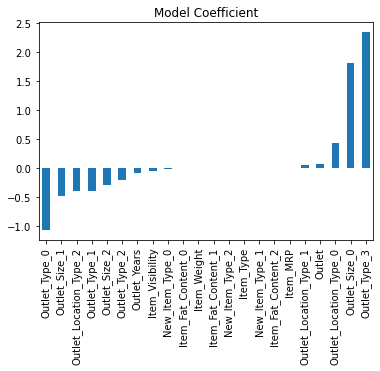

In [116]:
model = LinearRegression(normalize = True)
train(model, X, y)

coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind = 'bar', title = 'Model Coefficient')

In [117]:
test_preds = model.predict(test_inputs)

In [121]:
test_preds.reshape(1,5681)

array([[7.25860857, 7.10012739, 6.37510747, ..., 7.27303926, 8.14730922,
        6.96068054]])

In [122]:
pd.Series(test_preds)

0       7.258609
1       7.100127
2       6.375107
3       7.653825
4       8.814451
          ...   
5676    7.512934
5677    7.575909
5678    7.273039
5679    8.147309
5680    6.960681
Length: 5681, dtype: float64

In [123]:
df_test['Outlet_Item_Sales'] = pd.Series(test_preds)

In [125]:
df_test['Outlet_Item_Sales'] = np.exp(df_test['Outlet_Item_Sales']) - 1

In [135]:
df_test

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Years,Outlet,Item_Fat_Content_0,...,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2,Outlet_Item_Sales
0,FDW58,20.750000,0.007565,13,107.8622,OUT049,1999,14,9,1,...,0,0,0,1,0,0,0,1,0,1419.278943
1,FDW14,8.300000,0.038428,4,87.3198,OUT017,2007,6,2,0,...,1,0,0,1,0,0,0,1,0,1211.121481
2,NCN55,14.600000,0.099575,11,241.7538,OUT010,1998,15,0,0,...,0,1,1,0,0,0,0,0,1,586.048515
3,FDQ58,7.315000,0.015388,13,155.0340,OUT017,2007,6,2,1,...,1,0,0,1,0,0,0,1,0,2107.695082
4,FDY38,12.857645,0.118599,4,234.2300,OUT027,1985,28,5,0,...,0,1,0,0,0,1,0,1,0,6729.811174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500000,0.013496,13,141.3154,OUT046,1997,16,8,0,...,0,0,0,1,0,0,0,1,0,1830.579330
5677,FDD47,7.600000,0.142991,15,169.1448,OUT018,2009,4,3,0,...,0,1,0,0,1,0,0,1,0,1949.632457
5678,NCO17,10.000000,0.073529,8,118.7440,OUT045,2002,11,7,0,...,1,0,0,1,0,0,0,0,1,1439.923144
5679,FDJ26,15.300000,0.070213,3,214.6218,OUT017,2007,6,2,0,...,1,0,0,1,0,0,0,1,0,3453.072416


In [133]:
sum(df_test['Outlet_Item_Sales'] > 1000)

4231

In [136]:
submission_df = df_test.copy()
submission_df

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Years,Outlet,Item_Fat_Content_0,...,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2,Outlet_Item_Sales
0,FDW58,20.750000,0.007565,13,107.8622,OUT049,1999,14,9,1,...,0,0,0,1,0,0,0,1,0,1419.278943
1,FDW14,8.300000,0.038428,4,87.3198,OUT017,2007,6,2,0,...,1,0,0,1,0,0,0,1,0,1211.121481
2,NCN55,14.600000,0.099575,11,241.7538,OUT010,1998,15,0,0,...,0,1,1,0,0,0,0,0,1,586.048515
3,FDQ58,7.315000,0.015388,13,155.0340,OUT017,2007,6,2,1,...,1,0,0,1,0,0,0,1,0,2107.695082
4,FDY38,12.857645,0.118599,4,234.2300,OUT027,1985,28,5,0,...,0,1,0,0,0,1,0,1,0,6729.811174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500000,0.013496,13,141.3154,OUT046,1997,16,8,0,...,0,0,0,1,0,0,0,1,0,1830.579330
5677,FDD47,7.600000,0.142991,15,169.1448,OUT018,2009,4,3,0,...,0,1,0,0,1,0,0,1,0,1949.632457
5678,NCO17,10.000000,0.073529,8,118.7440,OUT045,2002,11,7,0,...,1,0,0,1,0,0,0,0,1,1439.923144
5679,FDJ26,15.300000,0.070213,3,214.6218,OUT017,2007,6,2,0,...,1,0,0,1,0,0,0,1,0,3453.072416


In [137]:
submission_df.to_csv('submission.csv', index = None)
from IPython.display import FileLink
FileLink('submission.csv')

/Users/akshitkamboj/submission.csv

In [138]:
pip install jovian --upgrade

     |████████████████████████████████| 68 kB 2.1 MB/s eta 0:00:01
  Created wheel for uuid: filename=uuid-1.30-py3-none-any.whl size=6501 sha256=d86453ad057c5b742a0308b2730f10c69c045b3c564477b61a3c8b77d9345a6b
  Stored in directory: /Users/akshitkamboj/Library/Caches/pip/wheels/05/d7/b4/4795d29c6decfffbf64c63e58b6c8b8bbfd4751488617dcd7a
Successfully built uuid
Note: you may need to restart the kernel to use updated packages.


In [139]:
import jovian

<IPython.core.display.Javascript object>

In [140]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ········
[jovian] Committed successfully! https://jovian.ai/akshitkamboj1/bigmart-project


'https://jovian.ai/akshitkamboj1/bigmart-project'